# Solución al ejercicio del tutorial de simulaciones

Seleccionaremos una muestra a partir de GUMS recortando una sección del cielo:

    select U.ra, U.dec, U.barycentric_distance, U.pmra, U.pmdec, U.mag_g, U.mean_absolute_v
    from gaiaedr3.gaia_universe_model as U
    where U.ra>0 and U.ra<10 and U.dec>0.0 and U.dec<10 and U.mean_absolute_v>5 and U.mean_absolute_v<6 and U.mag_g<20

La muestra puede encontrarse en el fichero _GUMS.csv_ (11329 objetos)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pygaia.errors.astrometric import *

## Lectura de la simulación

In [2]:
data = pd.read_csv('GUMS.csv')

ra= data['ra'].values # en deg
dec= data['dec'].values # en deg
distance= data['barycentric_distance'].values # en pc
parallax= 1000./distance # in mas
pmra= data['pmra'].values # en mas/yr
pmdec= data['pmdec'].values # en mas/yr
mag_g= data['mag_g'].values # en mag
Mv= data['mean_absolute_v'].values # en mag

## Añadimos los errores

In [3]:
# Calculamos los errores en función de la magnitud G
ra_error, dec_error = position_uncertainty(mag_g, release='dr3') # en muas
ra_error= ra_error/(3600*1000000) # en deg
dec_error= dec_error/(3600*1000000) # en deg

parallax_error = parallax_uncertainty(mag_g, release='dr3')/1000 # en mas
pmra_error, pmdec_error = proper_motion_uncertainty(mag_g, release='dr3') # en muas/yr
pmra_error= pmra_error/1000 # en mas/yr
pmdec_error= pmdec_error/1000 # en mas/yr


# Generamos valores observacionales a partir de los valores simulados (sin error)
ra_obs = np.random.normal(ra, ra_error)
ra_dec = np.random.normal(dec, dec_error)

parallax_obs= np.random.normal(parallax,parallax_error) # in mas

pmra_obs= np.random.normal(pmra,pmra_error) # in mas/yr
pmdec_obs= np.random.normal(pmdec,pmdec_error) # in mas/yr

## Ejercicio

A partir de la muestra anterior, realizar los siguientes cortes:

* Eliminar las paralajes negativas
* Seleccionar solo las estrellas con paralajes de buena calidad: $\varpi/\sigma_\varpi > 5$
* Seleccionar solo las estrellas con paralajes de excelentes: $\varpi/\sigma_\varpi > 10$

Comprobar como estas selecciones afectan a la distribucion de distancias reales, a la distribución de magnitud G y a la distribución de movimientos propios.

### Seleccionamos submuestras con los criterios indicados

Descomentar la opción que corresponda para cambiar la selección

In [4]:
# valid= parallax_obs>0.
# valid= parallax_obs/parallax_error > 5
valid= parallax_obs/parallax_error > 10

parallax_sel= parallax[valid]
parallax_sel_obs= parallax_obs[valid]

distance_sel= distance[valid]
mag_g_sel= mag_g[valid]

pmra_sel= pmra[valid]
pmdec_sel= pmdec[valid]

print("Tamaño muestra completa: {:6d}".format(len(parallax)))
print("Tamaño selección:        {:6d} ({:4.1f}%)".format(len(parallax_sel),100*len(parallax_sel)/len(parallax)))

Tamaño muestra completa:  34810
Tamaño selección:         14444 (41.5%)


### Comparación de histogramas de paralajes real / observada

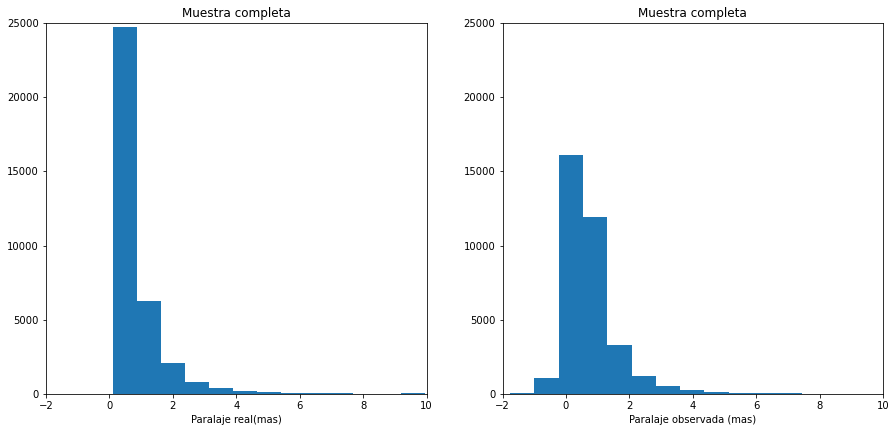

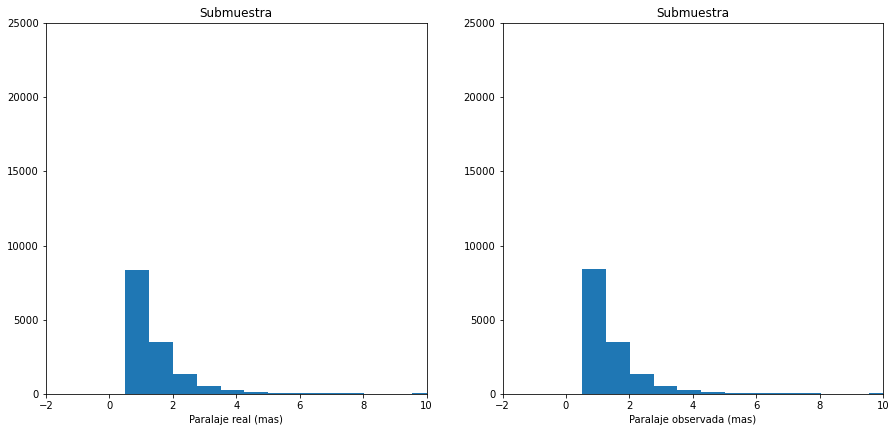

In [5]:
plt.rcParams["figure.figsize"] = (15,15)

plt.subplot(2,2,1)
plt.title("Muestra completa")
plt.xlabel("Paralaje real(mas)")
plt.xlim(-2,10) # Limitamos el eje X para visualizar mejor la zona central
plt.ylim(0,25000) # Limitamos el eje Y de forma comun a todos los histogramas
plt.hist(parallax,200)

plt.subplot(2,2,2)
plt.title("Muestra completa")
plt.xlabel("Paralaje observada (mas)")
plt.xlim(-2,10) # Limitamos el eje X para visualizar mejor la zona central
plt.ylim(0,25000) # Limitamos el eje Y de forma comun a todos los histogramas
plt.hist(parallax_obs,200)
plt.show()

plt.subplot(2,2,3)
plt.title("Submuestra")
plt.xlabel("Paralaje real (mas)")
plt.xlim(-2,10) # Limitamos el eje X para visualizar mejor la zona central
plt.ylim(0,25000) # Limitamos el eje Y de forma comun a todos los histogramas
plt.hist(parallax_sel,200)

plt.subplot(2,2,4)
plt.title("Submuestra")
plt.xlabel("Paralaje observada (mas)")
plt.xlim(-2,10) # Limitamos el eje X para visualizar mejor la zona central
plt.ylim(0,25000) # Limitamos el eje Y de forma comun a todos los histogramas
plt.hist(parallax_sel_obs,200)

plt.show()

### Comparación de distribuciones de distancia y magnitud

Nótese el corte en G que se produce aunque la selección sea solo en paralaje


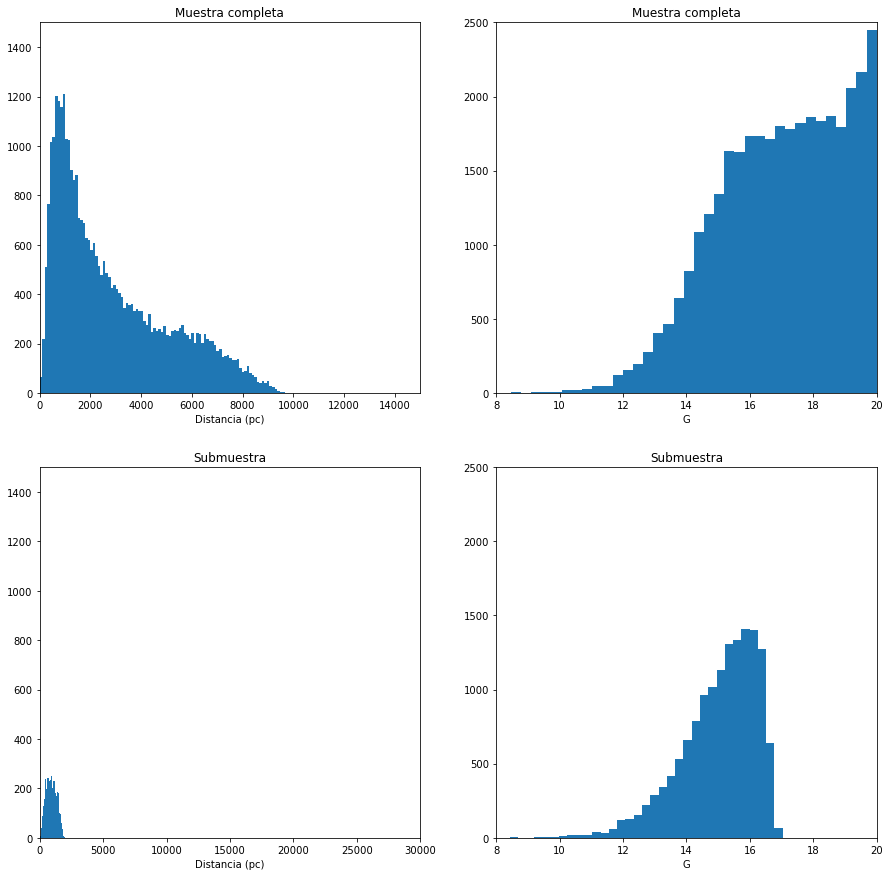

In [6]:
print("Nótese el corte en G que se produce aunque la selección sea solo en paralaje")

plt.rcParams["figure.figsize"] = (15,15)

plt.subplot(2,2,1)
plt.title("Muestra completa")
plt.xlabel("Distancia (pc)")
plt.xlim(0,15000) # Limitamos el eje X para visualizar mejor la zona central
plt.ylim(0,1500) # Limitamos el eje Y de forma comun a todos los histogramas
plt.hist(distance,100)

plt.subplot(2,2,2)
plt.title("Muestra completa")
plt.xlabel("G")
plt.ylim(0,2500) # Limitamos el eje Y de forma comun a todos los histogramas
plt.xlim(8,20) # Limitamos el eje X para visualizar mejor la zona central
plt.hist(mag_g,50)

plt.subplot(2,2,3)
plt.title("Submuestra")
plt.xlabel("Distancia (pc)")
plt.ylim(0,1500) # Limitamos el eje Y de forma comun a todos los histogramas
plt.xlim(0,30000) # Limitamos el eje X para visualizar mejor la zona central
plt.hist(distance_sel,100)

plt.subplot(2,2,4)
plt.title("Submuestra")
plt.xlabel("G")
plt.ylim(0,2500) # Limitamos el eje Y de forma comun a todos los histogramas
plt.xlim(8,20) # Limitamos el eje X para visualizar mejor la zona central
plt.hist(mag_g_sel,50)

plt.show()

### Comparación de distribuciones de movimientos propios

Nótese el cambio en las medias de los movimientos propios aunque la selección sea solo en paralaje

Medias muestra completa: 5.35 -7.08 
Medias selección:        6.82 -7.88 


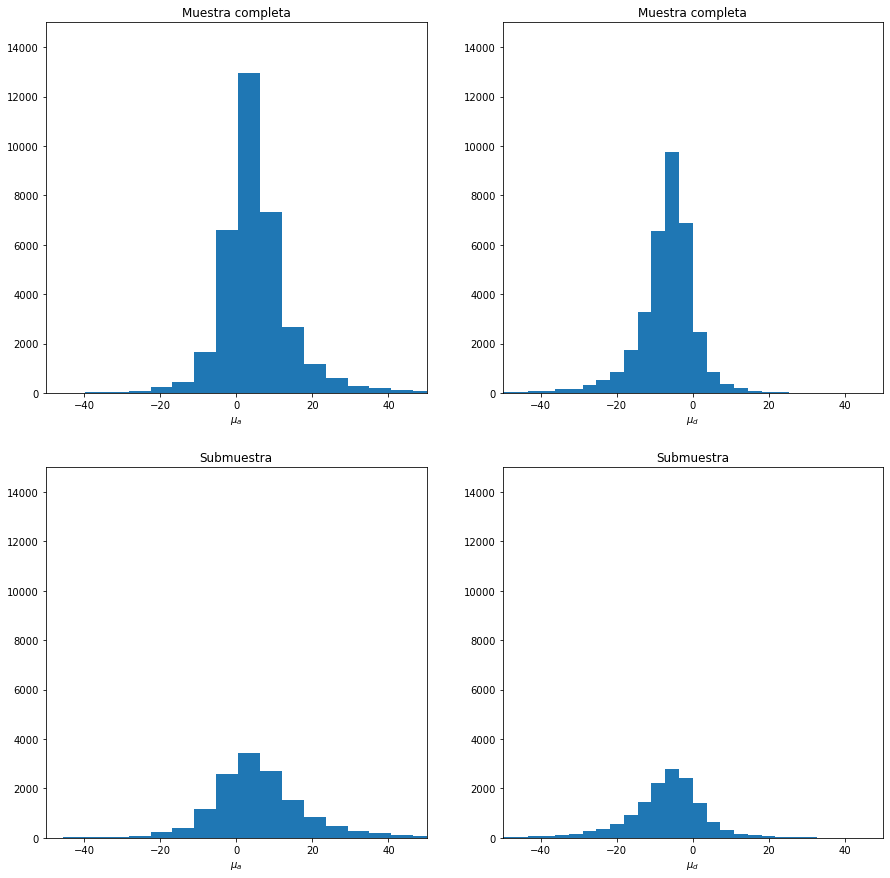

In [7]:
print("Nótese el cambio en las medias de los movimientos propios aunque la selección sea solo en paralaje\n")
print("Medias muestra completa: {:4.2f} {:4.2f} ".format(sum(pmra)/len(pmra),sum(pmdec)/len(pmdec)))
print("Medias selección:        {:4.2f} {:4.2f} ".format(sum(pmra_sel)/len(pmra_sel),sum(pmdec_sel)/len(pmdec_sel)))


plt.rcParams["figure.figsize"] = (15,15)

plt.subplot(2,2,1)
plt.title("Muestra completa")
plt.xlabel("$\mu_a$")
plt.xlim(-50,50) # Limitamos el eje X para visualizar mejor la zona central
plt.ylim(0,15000) # Limitamos el eje Y de forma comun a todos los histogramas
plt.hist(pmra,200)

plt.subplot(2,2,2)
plt.title("Muestra completa")
plt.xlabel("$\mu_d$")
plt.xlim(-50,50) # Limitamos el eje X para visualizar mejor la zona central
plt.ylim(0,15000) # Limitamos el eje Y de forma comun a todos los histogramas
plt.hist(pmdec,100)

plt.subplot(2,2,3)
plt.title("Submuestra")
plt.xlabel("$\mu_a$")
plt.xlim(-50,50) # Limitamos el eje X para visualizar mejor la zona central
plt.ylim(0,15000) # Limitamos el eje Y de forma comun a todos los histogramas
plt.hist(pmra_sel,200)

plt.subplot(2,2,4)
plt.title("Submuestra")
plt.xlabel("$\mu_d$")
plt.xlim(-50,50) # Limitamos el eje X para visualizar mejor la zona central
plt.ylim(0,15000) # Limitamos el eje Y de forma comun a todos los histogramas
plt.hist(pmdec_sel,100)

#Mg= mag_g_pos + 5 - 5*np.log10(distance_pos)
plt.show()